# Introducción a las Redes Neuronales


## ¿Qué son las Redes Neuronales?

Las Redes Neuronales Artificiales (ANNs) son modelos de computación inspirados en el cerebro humano. Consisten en capas de nodos, muy parecidos a las neuronas en el cerebro humano. Las redes neuronales pueden aprender patrones complejos y relaciones en los datos, lo que las hace particularmente eficaces para tareas como la clasificación de imágenes, el procesamiento del lenguaje natural, y la predicción en series temporales.

Una red neuronal típicamente consta de tres tipos de capas:

1. **Capa de entrada**: Recibe los datos de entrada y los pasa a la primera capa oculta.
2. **Capas ocultas**: Aquí es donde ocurre la mayor parte del cálculo. Cada nodo en una capa oculta representa una combinación de entradas de nodos en capas anteriores.
3. **Capa de salida**: Produce la predicción o clasificación de la red.

Cada conexión entre nodos tiene un peso, y cada nodo tiene una función de activación que transforma sus entradas en una salida.


## Tipos de Redes Neuronales

Existen varios tipos de redes neuronales, cada una con sus características y usos específicos. Algunos de los tipos más comunes son:

### 1. Redes Neuronales de Alimentación hacia Adelante (Feedforward Neural Networks)

Estas redes son la forma más simple de redes neuronales. En ellas, la información se mueve en una sola dirección, desde la capa de entrada, a través de las capas ocultas, y finalmente a la capa de salida. No hay ciclos o bucles en la red, la información siempre se mueve hacia adelante. Se utilizan principalmente para tareas de regresión y clasificación.

### 2. Redes Neuronales Convolucionales (CNNs)

Las CNNs son especialmente efectivas para tareas que involucran datos con estructura de cuadrícula, como imágenes. Las CNNs utilizan operaciones de convolución para procesar los datos, lo que les permite considerar la estructura espacial de los datos. Esto las hace muy eficientes para tareas como reconocimiento de imágenes y procesamiento de video.

### 3. Redes Neuronales Recurrentes (RNNs)

Las RNNs son adecuadas para tareas con datos secuenciales como series temporales o secuencias de texto. A diferencia de las redes de alimentación hacia adelante, las RNNs tienen conexiones que forman ciclos, permitiéndoles mantener un estado que puede representar información sobre la secuencia de datos hasta el momento. Sin embargo, a menudo tienen dificultades para aprender dependencias a largo plazo debido a problemas como el desvanecimiento del gradiente.

### 4. Long Short Term Memory Networks (LSTMs)

Las LSTMs son una variante especial de RNNs diseñada específicamente para abordar el problema del desvanecimiento del gradiente y son más eficaces en aprender dependencias a largo plazo. Tienen una estructura de celda de memoria más compleja que les permite regular mejor el flujo de información.

### 5. Redes Generativas Adversarias (GANs)

Las GANs constan de dos redes, una red generativa que produce datos y una red discriminativa que intenta distinguir entre datos reales y generados. Al entrenarse juntas, la red generativa aprende a producir datos que son indistinguibles de los reales. Se usan en tareas como la generación de imágenes, super-resolución, y transferencia de estilo.

### 6. Autoencoders

Los autoencoders son redes neuronales utilizadas para aprender representaciones eficientes de datos, típicamente para el propósito de reducción de dimensionalidad. Un autoencoder consta de dos partes, un codificador que comprime la entrada en una representación latente, y un decodificador que reconstruye la entrada a partir de esta representación.

### 7. Redes de Atención y Transformers

Las redes de atención son una clase de modelos que aprenden a ponderar diferentes partes de los datos de entrada cuando realizan una tarea, en lugar de depender por igual de todas las partes de la entrada. Los Transformers son un tipo específico de red de atención que se ha vuelto muy popular, especialmente en el procesamiento del lenguaje natural, y son la base de modelos como GPT y BERT.


## Conjunto de Datos MNIST

El conjunto de datos que vamos a utilizar para este proyecto se llama **MNIST** (Modified National Institute of Standards and Technology database). Es uno de los conjuntos de datos más emblemáticos en el campo del aprendizaje automático y la visión por computadora.

### Características del conjunto de datos MNIST:

- **Imágenes en escala de grises**: Contiene 70,000 imágenes en escala de grises de dígitos escritos a mano (del 0 al 9).

- **Tamaño de las imágenes**: Las imágenes son de un tamaño pequeño, específicamente de 28x28 píxeles.

- **División de datos**: De las 70,000 imágenes, 60,000 están destinadas para entrenamiento y 10,000 para pruebas.

- **Etiquetas**: Las etiquetas están representadas como números enteros del 0 al 9 y corresponden al dígito que la imagen representa.

MNIST es a menudo utilizado en tareas de clasificación de imágenes y reconocimiento de dígitos manuscritos. Se considera como el "Hola Mundo" del aprendizaje profundo debido a que es comúnmente el primer conjunto de datos con el que los practicantes experimentan.

Este conjunto de datos es ideal para principiantes porque, aunque es relativamente simple, ofrece suficiente desafío como para aprender diferentes aspectos del entrenamiento de modelos de aprendizaje profundo.

En nuestro código, el conjunto de datos MNIST se carga fácilmente utilizando la función `mnist.load_data()` proporcionada por TensorFlow. Esto facilita enormemente el acceso y uso del conjunto de datos sin la necesidad de procesos manuales de descarga y preprocesamiento.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


#conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

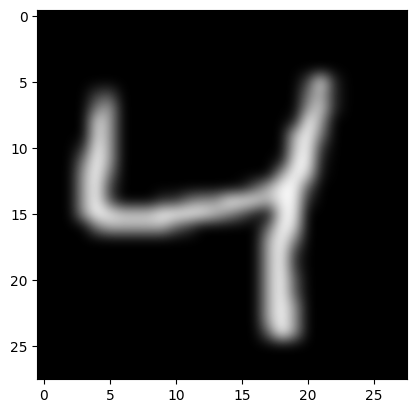

In [6]:
#Vemos un ejemplo de imagen

plt.imshow(train_images[2], cmap='gray', interpolation='bicubic')

## Reescalado de las Imágenes

En la etapa de preprocesamiento de los datos, una práctica común es reescalar los valores de los píxeles de las imágenes. Originalmente, los valores de los píxeles en las imágenes en escala de grises están en el rango de 0 a 255, donde 0 representa el color negro y 255 representa el color blanco. Los valores intermedios representan diversos tonos de gris.

### ¿Por qué reescalamos las imágenes?

El reescalado de las imágenes se realiza para ayudar a la convergencia del modelo durante el entrenamiento. Al reescalar los valores de los píxeles a un rango de 0 a 1, estamos normalizando los datos de entrada. La normalización de los datos de entrada es beneficiosa porque ayuda a evitar que los valores de los gradientes se vuelvan demasiado grandes o demasiado pequeños, lo que puede llevar a que el algoritmo de entrenamiento sea inestable o tarde mucho en converger.

### ¿Cómo lo hacemos?

El código que realiza este reescalado es el siguiente:

```python
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
# Reescalamos las imágenes para que los valores de los píxeles estén en el rango [0, 1]
# Esto ayuda a la convergencia del modelo
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

## Conversión de Etiquetas a Codificación One-Hot

Después de reescalar las imágenes, el siguiente paso en el preprocesamiento es convertir las etiquetas a la codificación one-hot.

### ¿Qué es la Codificación One-Hot?

La codificación one-hot es una representación de variables categóricas como vectores binarios. En nuestro caso, las etiquetas son números enteros del 0 al 9, que representan los dígitos escritos a mano. Para convertir estas etiquetas a la codificación one-hot, creamos un vector de longitud 10 (número de clases) para cada etiqueta, donde todas las entradas son 0, excepto para el índice que corresponde a la etiqueta, que se establece en 1.

Por ejemplo, la etiqueta `2` se convierte en el vector `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`.

### ¿Por qué usar la Codificación One-Hot?

El uso de la codificación one-hot es beneficioso cuando trabajamos con problemas de clasificación multiclase, como el nuestro. Al entrenar la red neuronal, queremos que la salida sea una distribución de probabilidad entre las diferentes clases. La codificación one-hot permite una comparación más natural entre la salida de la red y la etiqueta verdadera.

### Código para la Conversión a Codificación One-Hot

```python
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
# Convertimos las etiquetas (números enteros) a codificación one-hot
# Por ejemplo, convertimos la etiqueta 2 en [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Construcción de la Arquitectura de la Red Neuronal Convolucional (CNN)

Una Red Neuronal Convolucional (CNN) es un tipo de red neuronal artificial que es especialmente poderosa para tareas como el reconocimiento de imágenes. Las CNNs son capaces de identificar patrones jerárquicos en los datos, lo que las hace muy adecuadas para identificar formas, texturas, y objetos en imágenes.

Vamos a construir una CNN simple pero efectiva para nuestro problema de clasificación de dígitos escritos a mano.

### Inicializando un Modelo Secuencial

Inicializamos un modelo secuencial. Un modelo secuencial es un tipo de modelo que consiste en una pila lineal de capas. Esto significa que podemos agregar capas una tras otra en el orden en que queremos que los datos fluyan.

### Primera Capa Convolucional

Esta es la primera capa convolucional y la capa de entrada de nuestra red. Esta capa aprende 32 filtros y usa un kernel de tamaño 3x3. 

- **32**: Número de filtros que la capa convolucional aprenderá. Cada filtro es capaz de detectar una característica específica en la imagen.
- **(3, 3)**: Tamaño del kernel convolucional. Un kernel de 3x3 significa que el filtro tiene 3 píxeles de ancho y 3 píxeles de alto.
- **activation='relu'**: Función de activación ReLU (Rectified Linear Unit). Esta función de activación es muy común y ayuda a introducir la no linealidad en el modelo.
- **input_shape=(28, 28, 1)**: Es la forma de los datos de entrada. Cada imagen es de 28x28 píxeles con un solo canal de color (escala de grises).

### Primera Capa de Max Pooling

Esta capa realiza una operación de Max Pooling con un filtro de tamaño 2x2. Lo que hace es reducir la dimensión espacial de la entrada (ancho y alto) tomando el máximo valor en cada ventana de 2x2 píxeles. Esto ayuda a reducir la cantidad de parámetros y computación en la red, y también ayuda a extraer características más robustas.

### Segunda Capa Convolucional y Segunda Capa de Max Pooling

Estas capas son similares a las primeras, pero esta vez la capa convolucional aprende 64 filtros. Al incrementar el número de filtros en las capas más profundas, la red puede aprender características más complejas.

### Tercera Capa Convolucional

Finalmente, agregamos una tercera capa convolucional que también aprende 64 filtros con un kernel de 3x3. No seguimos esto con otra capa de Max Pooling porque la dimensión de la entrada ya se ha reducido lo suficiente.

Estas capas trabajan juntas para recibir imágenes de dígitos escritos a mano y transformarlas a través de una serie de convoluciones y reducciones de dimensiones, de manera que las características importantes de las imágenes sean capturadas y estén listas para ser clasificadas en las siguientes capas.


## Los Pesos en Redes Neuronales

En las redes neuronales, los **pesos** son valores numéricos asociados a las conexiones entre las neuronas. Son uno de los componentes más importantes en una red neuronal, ya que determinan cómo las señales entre neuronas se modulan durante el proceso de aprendizaje y predicción.

### ¿Qué hacen los pesos?

Cuando una neurona recibe datos de entrada, multiplica cada entrada por un peso, y luego suma estos productos. Los pesos determinan la importancia relativa de cada entrada para el cálculo realizado por la neurona. Esencialmente, si el peso es alto, la neurona considerará que esa entrada en particular es más importante que si el peso es bajo.

### Inicialización de los pesos

Al comienzo del entrenamiento, los pesos se inicializan generalmente con valores pequeños y aleatorios. Esto se hace para romper cualquier simetría que pudiera existir y permitir que la red neuronal aprenda de manera más efectiva.

Hay varias estrategias para inicializar los pesos, como la inicialización uniforme, la inicialización normal y la inicialización de He o Glorot, que están diseñadas para establecer los pesos de manera que faciliten la convergencia durante el entrenamiento.

### Aprendizaje y ajuste de los pesos

Durante el proceso de entrenamiento, el objetivo es ajustar los pesos de tal manera que minimicen una función de pérdida, que mide cuán lejos están las predicciones de la red de los valores verdaderos.

Utilizando algoritmos como el descenso de gradiente, se calcula cómo una pequeña variación en cada peso afectaría a la función de pérdida, y luego se ajustan los pesos en la dirección que reduce la pérdida.

### Regularización de los pesos

A veces, durante el entrenamiento, ciertos pesos pueden crecer demasiado, lo que puede llevar a un sobreajuste, donde la red se vuelve muy especializada en los datos de entrenamiento y no generaliza bien a datos nuevos.

Para evitar esto, a menudo se utiliza la regularización, que es una técnica que agrega un término a la función de pérdida que penaliza los pesos grandes. Esto fomenta que la red neuronal tenga pesos más pequeños y sea más capaz de generalizar a datos no vistos.

### Resumen

- Los pesos determinan la importancia relativa de las entradas en los cálculos de las neuronas.
- Se inicializan con valores pequeños y aleatorios y se ajustan durante el entrenamiento.
- La regularización se utiliza para evitar que los pesos crezcan demasiado y causen sobreajuste.


## ¿Qué significa un Kernel 3x3?

En una Red Neuronal Convolucional (CNN), un "kernel" se refiere a una pequeña matriz de pesos que se utiliza para realizar la operación de convolución. Cuando se convoluciona una imagen con este kernel, se realiza un producto elemento por elemento y una suma sobre una región de 3x3 píxeles de la imagen de entrada, y el resultado se almacena en la imagen de salida (mapa de características). Esto se repite desplazando el kernel a través de toda la imagen. 

Específicamente, un kernel de 3x3 tiene la siguiente forma: </br></br>
| w1 w2 w3 | </br>
| w4 w5 w6 | </br>
| w7 w8 w9 | </br>

Donde `w1` a `w9` representan los pesos. Esta matriz de 3x3 se superpone con una región de 3x3 de la imagen de entrada y se realiza una combinación lineal de los valores de los píxeles y los pesos del kernel.

La convolución ayuda a detectar características locales en la imagen, como bordes, texturas y patrones. Al ajustar los pesos en el kernel durante el entrenamiento, la red neuronal aprende qué características son importantes para hacer predicciones precisas.



In [ ]:
# Construimos la arquitectura de la Red Neuronal Convolucional

# Inicializamos un modelo secuencial
model = models.Sequential([
    # Primera capa convolucional: aprende 32 filtros usando un kernel de 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Primera capa de Max Pooling: reduce dimensionalidad a la mitad (14x14)
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional: aprende 64 filtros usando un kernel de 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Segunda capa de Max Pooling: reduce dimensionalidad a la mitad (7x7)
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional: aprende 64 filtros usando un kernel de 3x3
    layers.Conv2D(64, (3, 3), activation='relu')
])

## Aplanado de la Salida de las Capas Convolucionales

Después de pasar por varias capas convolucionales y de pooling, la salida es un tensor tridimensional con dimensiones (altura, ancho, canales). Sin embargo, las capas densas o completamente conectadas, esperan que los datos de entrada estén en forma de vectores unidimensionales.

La operación de **aplanado** (flattening) se utiliza para convertir el tensor tridimensional en un vector unidimensional, alineando todos los valores en un largo vector. Esto se realiza de modo que podamos alimentar los datos a las capas densas.

```python
model.add(layers.Flatten())


In [ ]:
# Aplanamos la salida de las capas convolucionales
# De modo que podamos alimentarla a una capa densa (completamente conectada)
model.add(layers.Flatten())

## Añadiendo una Capa Densa

Una capa densa o completamente conectada es una capa en la cual cada neurona está conectada a todas las neuronas de la capa anterior. Esto significa que cada neurona recibe como entrada un valor ponderado de cada neurona de la capa anterior.

En nuestro modelo, añadimos una capa densa con la siguiente línea de código:

```python
model.add(layers.Dense(64, activation='relu'))


La función ReLU es una función simple definida como ReLU(x) = max(0, x). Esto significa que si la entrada es positiva, la función devuelve la entrada sin cambios, mientras que si es negativa, devuelve 0. ReLU es popular en redes neuronales porque es computacionalmente eficiente y ayuda a mitigar el problema del desvanecimiento del gradiente, lo que permite que las redes neuronales profundas aprendan más eficazmente.

In [ ]:
# Capa Densa con 64 neuronas y función de activación ReLU
model.add(layers.Dense(64, activation='relu'))

## Añadiendo la Capa de Salida

La capa de salida de nuestra red neuronal es responsable de producir las predicciones finales. En problemas de clasificación, como el reconocimiento de dígitos, la capa de salida tiene generalmente tantas neuronas como clases haya para predecir. En este caso, tenemos 10 clases (los dígitos del 0 al 9), por lo que la capa de salida tiene 10 neuronas.

En la capa de salida, utilizamos la función de activación **softmax**. Esta función convierte un vector de números reales en probabilidades que suman 1. Esto nos permite interpretar las salidas de la red como probabilidades de que la entrada pertenezca a cada una de las clases.

Aquí está el código que agrega la capa de salida:

```python
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# Capa de salida con 10 neuronas (una por cada clase 0-9) y función de activación softmax
# Que nos da la probabilidad de que la entrada pertenezca a cada clase
model.add(layers.Dense(10, activation='softmax'))

## Compilación del Modelo

Una vez que hemos construido la arquitectura de la red neuronal, el siguiente paso es compilar el modelo. Compilar el modelo implica configurar el proceso de aprendizaje antes de entrenar el modelo con los datos. Para compilar el modelo, necesitamos especificar al menos tres elementos clave: el optimizador, la función de pérdida y las métricas de evaluación.

### Optimizador

El optimizador es el algoritmo que se utiliza para actualizar los pesos de la red durante el entrenamiento. En este caso, se está utilizando el optimizador 'adam'. Adam es un optimizador de gradiente estocástico ampliamente utilizado porque combina las ventajas de otros dos optimizadores populares - AdaGrad y RMSProp.

### Función de Pérdida

La función de pérdida es una métrica que mide cuán bien el modelo está realizando el aprendizaje durante el entrenamiento. Queremos minimizar esta función, lo que se traduciría en mejorar la precisión del modelo. En este caso, para un problema de clasificación multiclase como el nuestro, se utiliza 'categorical_crossentropy' como función de pérdida.

### Métricas

Las métricas son utilizadas para monitorear el rendimiento del modelo. No afectan el funcionamiento del modelo, pero son importantes para evaluar su desempeño. En este caso, se está utilizando 'accuracy' como métrica, que calcula la precisión de las clasificaciones realizadas por el modelo.


In [ ]:
# Especificamos el optimizador, la función de pérdida y las métricas para el entrenamiento
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

Ahora que hemos compilado nuestro modelo, el siguiente paso es entrenarlo utilizando los datos de entrenamiento. Para hacerlo, utilizamos la función `fit` de Keras.

```python
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Vamos a desglosar los componentes de esta función:

- `model.fit()`: Esta es la función que realmente entrena el modelo. Se encarga de ajustar los pesos de la red neuronal utilizando los datos de entrenamiento que se le proporcionan.

- `train_images`: Son los datos de entrada que se utilizan para entrenar el modelo.

- `train_labels`: Son las etiquetas correctas asociadas a los datos de entrenamiento. El modelo intentará aprender a predecir estas etiquetas a partir de las imágenes de entrenamiento.

- `epochs=5`: Especifica el número de épocas, donde una época es una iteración completa sobre todo el conjunto de datos de entrenamiento. En este ejemplo, todo el conjunto de datos pasará por la red neuronal 5 veces. Es importante tener cuidado con el número de épocas, ya que un número demasiado alto podría llevar a un sobreajuste (overfitting), en el cual el modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalización.

- `batch_size=64`: Especifica el tamaño del lote (batch). Esto significa que el modelo tomará 64 ejemplos de los datos de entrenamiento a la vez y los usará para actualizar los pesos. Un tamaño de lote más pequeño significa que el modelo se actualizará con más frecuencia, lo que puede ser beneficioso para la convergencia, pero también más costoso computacionalmente.


In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [1]:
# Calculamos la precisión del modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

2023-07-07 13:01:04.944439: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 13:01:04.946023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 13:01:04.978472: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 13:01:04.979028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 13:01:05.541262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

11490434/11490434 [==============================] - 4s 0us/step
Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1877 - accuracy: 0.9432
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0531 - accuracy: 0.9828
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0378 - accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9921
Test accuracy: 0.9921000003814697


In [10]:
# Guardar el modelo en un archivo
model.save('numeros.h5')


/home/deme/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Cargando la red y haciendo predicciones

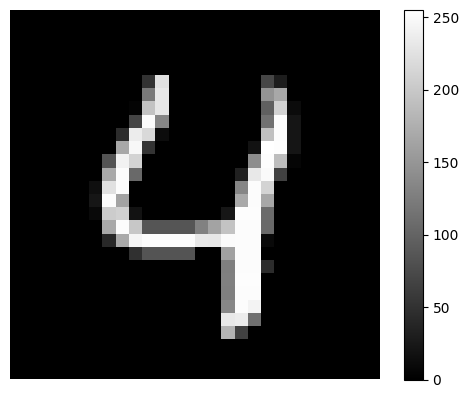

In [14]:
imagen = test_images[4].reshape(28, 28)
plt.imshow(imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [13]:
test_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 224,   0,
          0,   0,   0,   0,   0,   0,  70,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
from tensorflow.keras.models import load_model
import numpy as np

# Cargamos el modelo desde el archivo
modelo_cargado = load_model('numeros.h5')

# Tomamos una imagen del conjunto de pruebas (por ejemplo la primera)
nueva_imagen = test_images[4]

# Aumentamos la dimensión de la imagen para que tenga la forma (1, 28, 28, 1) requerida por el modelo
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

# Hacemos la predicción usando el modelo cargado
predicciones = modelo_cargado.predict(nueva_imagen)

# Obtenemos el dígito con la mayor probabilidad
digito_predicho = np.argmax(predicciones)

print(f'Dígito predicho: {digito_predicho}')


1/1 [==============================] - 0s 65ms/step
Dígito predicho: 4
